In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from matplotlib.cm import rainbow
import collections
from tqdm import tqdm_notebook as tqdm
import scipy.stats as sps
import pickle

import tensorflow as tf
import tensorflow_probability as tfp
from IPython.display import clear_output

%matplotlib inline


tfd = tfp.distributions


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
%%writefile datasets.py

import numpy as np
import scipy.stats as sps
import pickle

class DataSet:
    
    def __init__(self, count=100, nClasses=10, L=20, alpha_high=1, beta_high=10, scale=30, random_seed=42):
        np.random.seed(seed=random_seed)
        s = sps.expon.rvs(scale=scale, size=count)
        m = sps.beta.rvs(alpha_high, beta_high, size=count)
        
        self.alpha0 = s * m
        self.beta0 = s * (1 - m)
        self.p = sps.beta.rvs(self.alpha0, self.beta0, size=(nClasses, count)).T
        self.train_data = sps.binom.rvs(n=L, p=self.p)
        self.val_data = sps.binom.rvs(n=L, p=self.p)
        self.ideal = sps.binom.rvs(n=10 ** 6, p=self.p)
        
def load_data_set(filename):
    with open(filename, 'rb') as input_:
        return pickle.load(input_)
        
def save_data_set(filename, dataset):
    with open(filename, 'wb') as output:
        pickle.dump(dataset, output, pickle.HIGHEST_PROTOCOL)

Overwriting datasets.py


In [7]:
from datasets import *

In [8]:
data_set_small = DataSet(100, 10)
data_set_big = DataSet(100, 100)
data_set_super = DataSet(3, 1000)

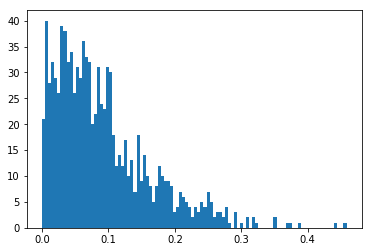

(array([ 1.30220964, 16.55912986,  5.1140643 ]),
 array([12.77583306, 73.74451307, 34.3883065 ]))

In [9]:
plt.hist(data_set_super.p[0], bins=100)
plt.show()
data_set_super.alpha0, data_set_super.beta0

In [10]:
! mkdir datasets

mkdir: cannot create directory ‘datasets’: File exists


In [11]:
save_data_set("./datasets/100.10", data_set_small)
save_data_set("./datasets/100.100", data_set_big)